# FM-223: Lista 5

Aluno: Vinícius Freitas de Almeida

## Exercício 1

Mostre que o conjunto dos números racionais entre 0 e 1 é contável

Obs.: Resolução baseada no livro "Principles of Mathematical Analysis" do Walter Rudin

Todo número racional entre 0 e 1 pode ser representado unicamente pela razão

$$ q = \frac{a}{b} $$

em que $a \ge 0$ e $b > 0$ são inteiros tais que $a$ e $b$ não possuem fatores em comum.

Além disso, 

$$ 0 \le q \le 1 \iff 0 \le \frac{a}{b} \le 1 \iff 0 \le a \le b $$

Para provar que o conjunto é enumerável, basta mostrar que existe uma função bijetora entre o conjunto dos números naturais $\mathbb{N}$ e o conjunto dos números racionais entre 0 e 1. Neste caso particular em que $0 \le a \le b$, pode-se construir uma função bijetora $f: \mathbb{N} \to \mathbb{Q} \cap [0,1]$ da forma a seguir.

Tabela com linhas (j) e colunas (i), ignorando os elementos acima da diagonal:

| j \ i | 0 | 1 | 2 | 3 | ... |
|-------|---|---|---|---|-----|
| 1     | 1 | 2 | - | - | ... |
| 2     | 3 | 4 | 5 | - | ... |
| 3     | 6 | 7 | 8 | 9 | ... |
| 4     | 10 | 11 | 12 | 13| ... |

Percebe-se, na tabela acima, que é possível enumerar todos os elementos do conjunto $A = \{ (i,j) \in \mathbb{Z}^2 | 0 \le i \le j \text{ e } j > 0 \}$. Ou seja, $A$ é enumerável.

Agora, chamando de $B$ o conjunto dos números racionais entre 0 e 1, percebe-se que cada elemento de $B$ pode ser representado por um par $(i,j) \in A$:

$$ q = \frac{i}{j}, \text{ com } (i,j) \in A $$

No entanto, percebe-se que há mais elementos em $A$ do que em $B$, pois cada elemento de $B$ pode ser representado por mais de um par $(i,j) \in A$. Por exemplo, o número 1/2 pode ser representado por (1,2), (2,4), (3,6), etc.

Assim, a função bijetora $f: \mathbb{N} \to \mathbb{Q} \cap [0,1]$ que procuramos deve pular os pares $(a,b)$ em que $a$ e $b$ possuem fatores em comum. Para isso, basta definir $f$ da seguinte forma:

| b \ a | 0 | 1 | 2 | 3 | ... |
|-------|---|---|---|---|-----|
| 1     | 1 | 2 | - | - | ... |
| 2     | x | 3 | x | - | ... |
| 3     | x | 4 | 5 | x | ... |
| 4     | x | 6 | x | x| ... |

Da tabela acima, cada índice $n \in \mathbb{N}$ corresponde a um, e apenas um, par de valores $(a,b) \in A$ que são primos entre si. Além disso, pulamos (marcando com x) os pares que têm múltiplos comuns. Ou seja, $f$ é uma função bijetora entre $\mathbb{N}$ e $\mathbb{Q} \cap [0,1]$.

# Exercício 2

Mostre que o conjunto de Cantor do terço-médio é incontável

Obs.: Resolução baseada  nas notas de aula "Math 424A/574A" https://sites.math.washington.edu/%7Ehart/m424/Cantorset.pdf do Prof. Hart Smith.

O conjunto do terço médio de Cantor é construído a partir do segmento $[0,1]$, com sucessivas remoções recursivas do terço médio de cada segmento restante. O conjunto resultante é o conjunto de Cantor do terço médio:

$$C_0 := [0,1]$$
$$C_n = \frac{C_{n-1}}{3} \cup \left( \frac{2}{3} + \frac{C_{n-1}}{3}\right), \text{ para } n \ge 1$$

O conjunto de Cantor do terço médio é o conjunto limite:

$$C := \lim_{n \to \infty} C_n$$

Representando os números no intervalo $[0,1]$ na base ternária, tal construção pode ser entendida como um processo sucessivo da remoção dos elementos que contém o dígito 1 na sua representação ternária. Por exemplo, o conjunto $C_1$ é formado pelos números que não contém o dígito 1 na sua representação ternária na primeira casa após a vírgula. O conjunto $C_2$, por sua vez, é o conjunto $C_1$ com a remoção dos elementos que contém o dígito 1 na sua representação ternária na segunda casa após a vírgula. E assim por diante.

Assim, o conjunto $C$ é o conjunto de todos os números reais no intervalo $[0,1]$ que não contêm o dígito 1 em nenhuma casa após a vírgula na sua representação ternária. Ou seja, $C$ é o conjunto de todos os números no intervalo $[0,1]$ cuja representação ternária é formada apenas pelos dígitos 0 e 2:


$$C = \left\{ \sum_{n=1}^{\infty} \frac{a_n}{3^n} | a_n \in \{0,2\} \right\}$$

Tal processo pode ser entendido como uma árvore binária, como na figura abaixo:

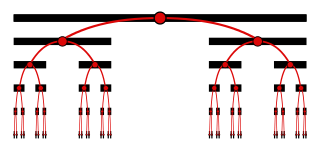

Pelo argumento da diagonalização de Cantor, pode-se perceber que o conjunto das sequências de dígitos ternários $\{a_n\}$ é incontável. Assim, o conjunto $C$ é incontável.

# Exercício 3

Plote o conjunto de Cantor usando o método probabilístico do Example 4.3.

Para isso, use a função `rand()` para gerar um número aleatório entre 0 e 1. Se o número for maior do que 1/2, considere "cara", senão, considere "coroa". Mostre vários "zoom in" para observar a invariância à escala.

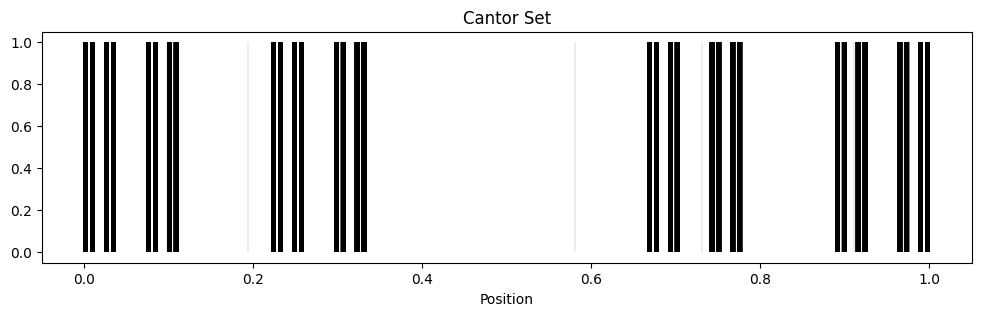

In [1]:
import numpy as np

# Set the initial random number and the number of iterations
n0 = np.random.rand()
num_iterations = 10000

# Generate random coin tosses
coin_tosses = np.random.rand(num_iterations)

# Initialize X_1 with the initial random number
X_1 = np.full(num_iterations, n0)

# Create an array to store the results
Y_1 = np.zeros(num_iterations)

# Perform the iterations and update X_1
for i in range(1, num_iterations):
    move_closer_to_1 = (coin_tosses[i] >= 0.5)
    move_closer_to_0 = not move_closer_to_1

    X_1[i] = X_1[i - 1] + ((2/3) * (1 - X_1[i - 1])) if move_closer_to_1 else X_1[i - 1] - ((2/3) * X_1[i - 1])

# Only keep the non-repeated elements in X_1
X_1 = np.unique(X_1)

# Plot the Cantor set if needed
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))
plt.vlines(X_1, 0, 1, color='black', linewidth=0.1)
plt.xlabel('Position')
plt.title('Cantor Set')
plt.show()


# Exercício 4

Plote o fractal probabilístico do computer experiment 4.1. Mostre vários "zoom in"

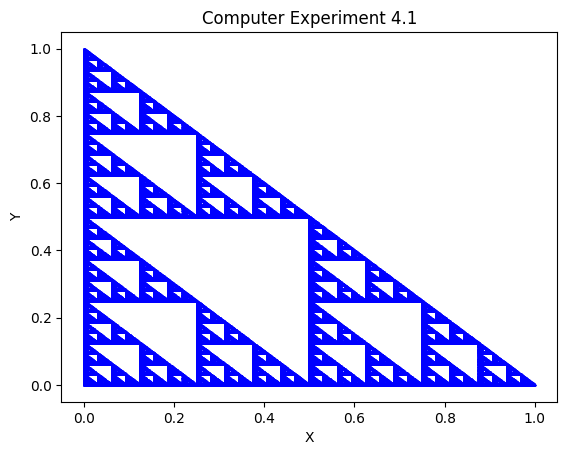

In [2]:
import numpy as np

# Define the functions f1, f2, and f3
def f1(x, y):
    return x / 2, y / 2

def f2(x, y):
    return (1 + x) / 2, y / 2

def f3(x, y):
    return x / 2, (1 + y) / 2

# Set the initial random point
x0 = np.random.uniform(0, 1)
y0 = np.random.uniform(0, 1)

num_iterations = 300000

# Create arrays to store the results
x = np.empty(num_iterations)
y = np.empty(num_iterations)

for i in range(num_iterations):
    m = np.random.uniform(0, 1)

    if m >= 2 / 3:
        x0, y0 = f3(x0, y0)
    elif 1 / 3 <= m < 2 / 3:
        x0, y0 = f2(x0, y0)
    else:
        x0, y0 = f1(x0, y0)

    x[i] = x0
    y[i] = y0

# Plot the result if needed
import matplotlib.pyplot as plt

plt.scatter(x, y, s=1, c='b', marker='.')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Computer Experiment 4.1')
plt.show()


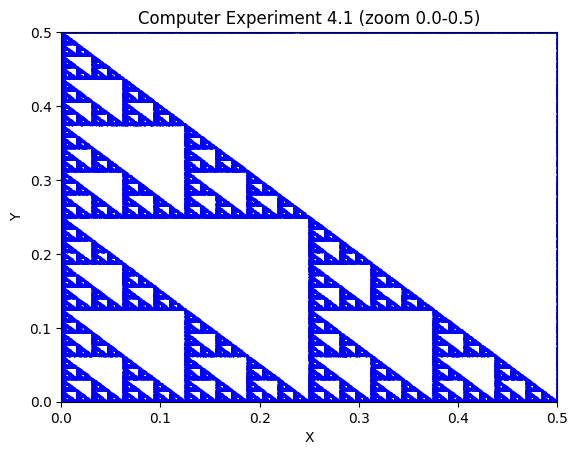

In [3]:
lims = [0.0, 0.5]
plt.scatter(x, y, s=1, c='b', marker='.')
plt.xlim(lims)
plt.ylim(lims)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Computer Experiment 4.1 (zoom 0.0-0.5)')
plt.show()

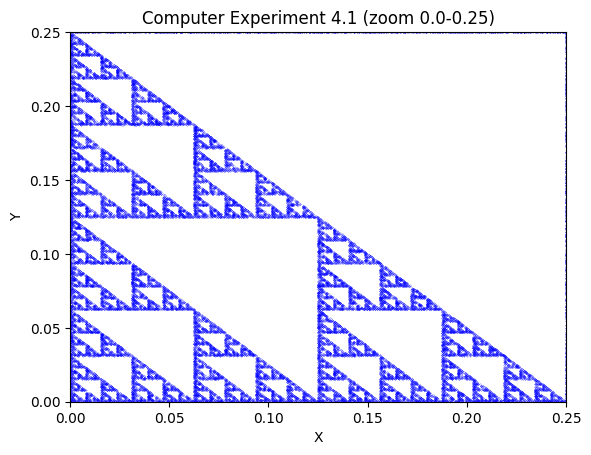

In [4]:
lims = [0.0, 0.25]
plt.scatter(x, y, s=0.1, c='b', marker='.')
plt.xlim(lims)
plt.ylim(lims)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Computer Experiment 4.1 (zoom 0.0-0.25)')
plt.show()

# Exercício 5

Plote o conjunto de Mandelbrot da Fig. 4.10

/tmp/ipykernel_11922/201875928.py:5: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/tmp/ipykernel_11922/201875928.py:5: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function mandelbrot failed at nopython mode lowering due to: 
  @jit
/home/vinicius/.pyenv/versions/3.11.6/lib/python3.11/site-packages/numba/core/utils.py:213: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style' in a future release. See details at https://numba.readthedocs.io/en/latest/reference/deprecation.html#deprecation-of-old-style-numba-captu

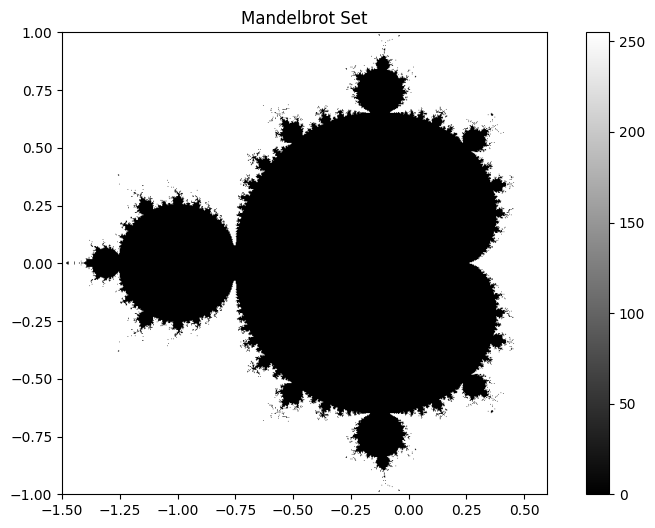

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

@jit
def mandelbrot(a, b):
    z = 0j

    for i in range(40):
        z = z * z + complex(a, b)

        if abs(z) >= 2:
            return [0, 0]

    return [a, b]

def plot_mandelbrot(width, height, x_min, x_max, y_min, y_max):
    mandelbrot_set = np.zeros((height, width), dtype=np.uint8)

    for x in range(width):
        for y in range(height):
            a = x * (x_max - x_min) / (width - 1) + x_min
            b = y * (y_max - y_min) / (height - 1) + y_min

            result = mandelbrot(a, b)

            if result[0] == 0 and result[1] == 0:
                mandelbrot_set[y, x] = 255

    plt.figure(figsize=(10, 6))
    plt.imshow(mandelbrot_set, extent=(x_min, x_max, y_min, y_max), cmap='gray', origin='lower')
    plt.colorbar()
    plt.title('Mandelbrot Set')
    plt.show()

# Set the parameters for the Mandelbrot set
width, height = 800, 600
x_min, x_max = -1.5, 0.6
y_min, y_max = -1.0, 1.0

# Call the function to plot the Mandelbrot set
plot_mandelbrot(width, height, x_min, x_max, y_min, y_max)


# Exercício 6

Plote o conjunto de Julia da Fig. 4.11

In [8]:
@jit
def julia(a, b, re_z, im_z):
    c = complex(a, b)
    z = complex(re_z, im_z)

    for i in range(100):
        z = z * z + c

        if abs(z) >= 2:
            return [0, 0]

    return [re_z, im_z]

/tmp/ipykernel_11922/894278034.py:1: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit


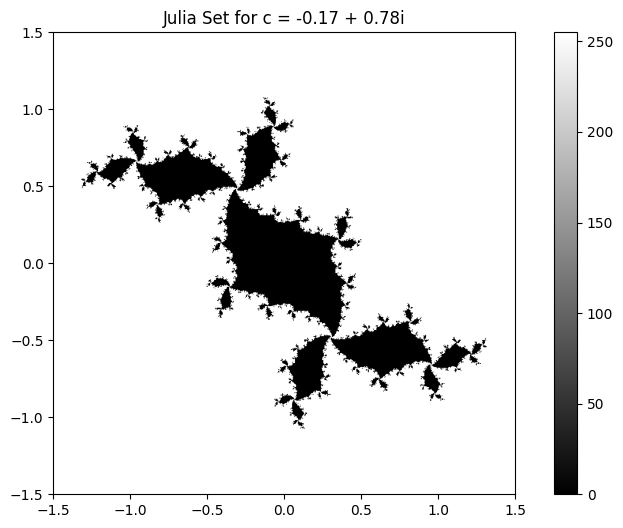

In [13]:
def plot_julia(width, height, x_min, x_max, y_min, y_max, a, b):
    julia_set = np.zeros((height, width), dtype=np.uint8)

    for x in range(width):
        for y in range(height):
            re_z = x * (x_max - x_min) / (width - 1) + x_min
            im_z = y * (y_max - y_min) / (height - 1) + y_min

            result = julia(a, b, re_z, im_z)

            if result[0] == 0 and result[1] == 0:
                julia_set[y, x] = 255

    plt.figure(figsize=(10, 6))
    plt.imshow(julia_set, extent=(x_min, x_max, y_min, y_max), cmap='gray', origin='lower')
    plt.colorbar()
    plt.title(f'Julia Set for c = {a} + {b}i')
    plt.show()

# Set the parameters for the Julia set
width, height = 800, 600
x_min, x_max = -1.5, 1.5
y_min, y_max = -1.5, 1.5
a, b = -0.17, 0.78

plot_julia(width, height, x_min, x_max, y_min, y_max, a, b)

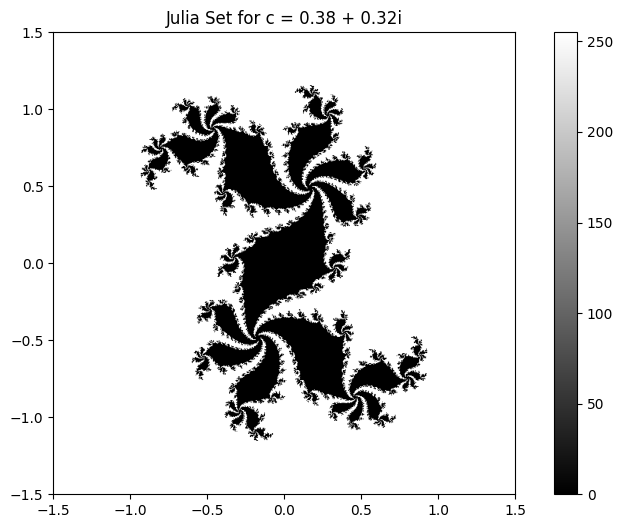

In [14]:
a, b = 0.38, 0.32

plot_julia(width, height, x_min, x_max, y_min, y_max, a, b)

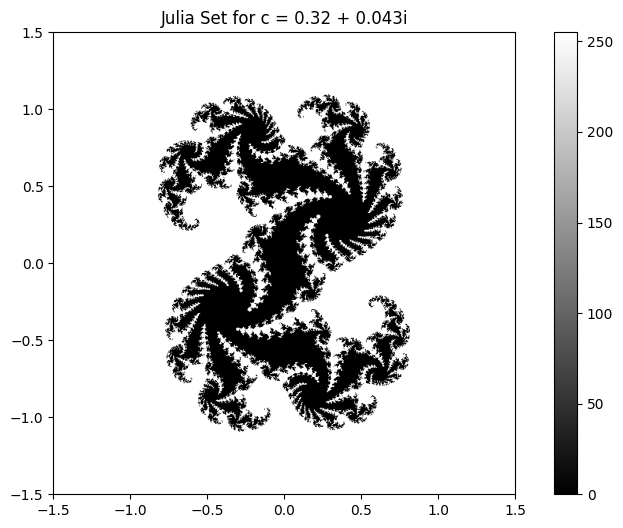

In [15]:
a, b = 0.32, 0.043

plot_julia(width, height, x_min, x_max, y_min, y_max, a, b)